# Fashion MNIST

## Imports

In [114]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import joblib
from datetime import datetime
import os

## Functions

In [142]:
def dump_keras_model(model,path="Trained Models\\",filename=None,yhat=None,scores=None):
    '''
    FOR Keras Model ONLY.
    Dump the objects passed as arguments into .h5 and .pkl file.
    '''
    try:
        os.mkdir(path)
    except:
        pass
    timestamp = datetime.today().strftime("%Y-%m-%d_%H-%M-%S")
    # Dump keras model
    if not filename: filename = model.name
    model.save(filepath=path+timestamp+'_'+filename)
    # Dump yhat
    if yhat is not None:
        joblib.dump(yhat,path+filename+"_yhat"+".pkl",compress=compress)
    # Dump cv scores
    if scores is not None:
        joblib.dump(scores,path+filename+"_scores"+".pkl",compress=compress)

## Loading the Datasets

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_raw,y_train_raw),(X_test_raw,y_test_raw) = fashion_mnist.load_data()

In [11]:
X_train_raw.shape,y_train_raw.shape,X_test_raw.shape,y_test_raw.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [19]:
X_train_raw[0][20][20]

218

### Saving the Datasets

In [22]:
joblib.dump(X_train_raw,"Datasets\\X_train_raw.pkl",compress=9)
joblib.dump(y_train_raw,"Datasets\\y_train_raw.pkl",compress=9)
joblib.dump(X_test_raw,"Datasets\\X_test_raw.pkl",compress=9)
joblib.dump(y_test_raw,"Datasets\\y_test_raw.pkl",compress=9)

['Datasets\\y_test_raw.pkl']

## Splitting the Datasets

In [23]:
X_valid,X_train = X_train_raw[:5000]/255,X_train_raw[5000:]/255
y_valid,y_train = y_train_raw[:5000],y_train_raw[5000:]

## Visualization the classes

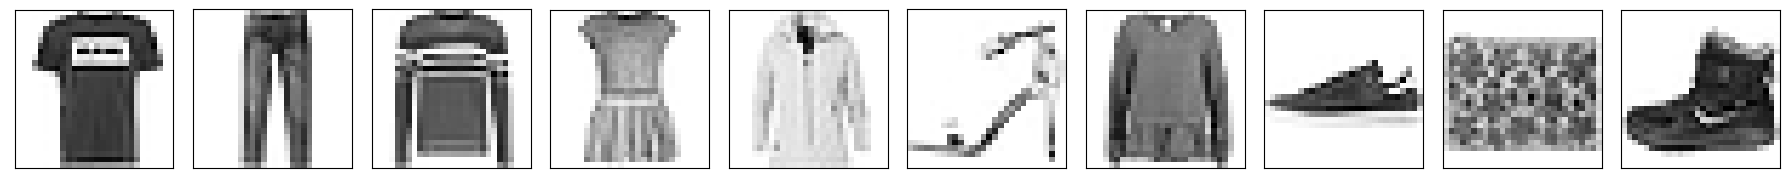

In [34]:
fig,axs = plt.subplots(1,10,figsize=(18,2),facecolor='w',tight_layout=True)

for label,ax in zip(np.unique(y_train_raw),axs):
    mask = (y_train_raw == label)
    img_to_plot = X_train_raw[mask][0]
    ax.imshow(img_to_plot,cmap='Greys')
    ax.set(xticks=[],yticks=[])  
plt.show()

In [35]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [36]:
class_names[y_train[0]]

'Coat'

## Creating MLP Model

In [37]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax'),
])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [45]:
[print(layer.name) for layer in model.layers];

flatten
dense
dense_1
dense_2


In [46]:
hidden1 = model.layers[1]

In [47]:
hidden1_weights,hidden1_biases = hidden1.get_weights()

In [48]:
hidden1_weights,hidden1_weights.shape

(array([[ 0.06498937,  0.05214766,  0.03527758, ..., -0.00903869,
          0.03772631,  0.03320682],
        [-0.0115306 ,  0.03260753, -0.04416069, ..., -0.05374807,
          0.04033808,  0.07033283],
        [-0.02088022, -0.03008883, -0.02647685, ...,  0.03207753,
          0.05423865,  0.06380297],
        ...,
        [ 0.03601865,  0.03935643, -0.06725472, ...,  0.0086787 ,
         -0.04731528,  0.06544115],
        [-0.00841468,  0.0397652 ,  0.04542952, ...,  0.00759975,
          0.03153352,  0.02318063],
        [ 0.05796784,  0.01475143,  0.03543252, ...,  0.04410317,
         -0.04223649,  0.01798294]], dtype=float32),
 (784, 300))

In [49]:
hidden1_biases,hidden1_biases.shape

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [50]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

## Train the MLP model

In [51]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7085 - accuracy: 0.7692 - val_loss: 0.4961 - val_accuracy: 0.8360
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4826 - accuracy: 0.8322 - val_loss: 0.4261 - val_accuracy: 0.8576
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4396 - accuracy: 0.8468 - val_loss: 0.4199 - val_accuracy: 0.8594
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4108 - accuracy: 0.8559 - val_loss: 0.3925 - val_accuracy: 0.8608
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3927 - accuracy: 0.8623 - val_loss: 0.3749 - val_accuracy: 0.8730
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3757 - accuracy: 0.8671 - val_loss: 0.3917 - val_accuracy: 0.8586
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3632 - accuracy: 0.8724 - val_loss: 0.3593 - val_accuracy:

### Learning Curve

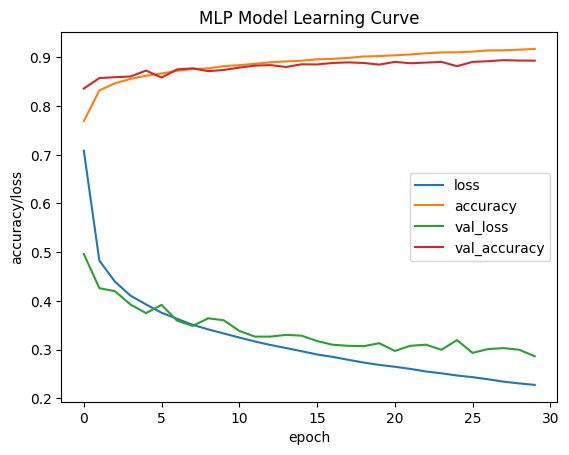

In [61]:
pd.DataFrame(history.history).plot(title="MLP Model Learning Curve",
                                   xlabel="epoch",ylabel="accuracy/loss")
plt.show()

In [63]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2243 - accuracy: 0.9181 - val_loss: 0.2893 - val_accuracy: 0.8950
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2199 - accuracy: 0.9208 - val_loss: 0.2967 - val_accuracy: 0.8920
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2164 - accuracy: 0.9219 - val_loss: 0.2877 - val_accuracy: 0.8938
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2142 - accuracy: 0.9221 - val_loss: 0.2929 - val_accuracy: 0.8930
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2092 - accuracy: 0.9241 - val_loss: 0.3122 - val_accuracy: 0.8852
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2063 - accuracy: 0.9257 - val_loss: 0.2809 - val_accuracy: 0.8946
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2028 - accuracy: 0.9271 - val_loss: 0.3039 - val_accuracy:

In [90]:
X_test = X_test_raw/255

In [91]:
model.evaluate(X_test,y_test_raw)

313/313 [==============================] - 0s 1ms/step - loss: 0.3309 - accuracy: 0.8834


[0.330851674079895, 0.883400022983551]

## Predictions

In [93]:
X_new = X_test[:5]
y_proba = model.predict(X_new).round(2)
y_proba

1/1 [==============================] - 0s 18ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.27, 0.  , 0.01, 0.  , 0.  , 0.  , 0.72, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [94]:
y_pred = np.argmax(y_proba,axis=1)
y_pred

array([9, 2, 1, 1, 6], dtype=int64)

In [100]:
y_pred_translated = np.array(class_names)[y_pred]
y_pred_translated

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

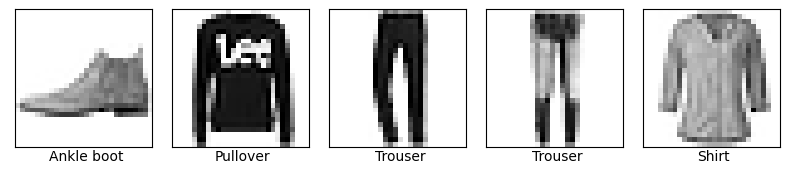

In [103]:
fig,axs = plt.subplots(1,5,figsize=(8,2),tight_layout=True,facecolor='w')

for ax,x,label in zip(axs,X_new,y_pred_translated):
    ax.imshow(x,cmap='Greys')
    ax.text(14,28,label,ha='center',va='top')
    ax.set(xticks=[],yticks=[])

## Saving the Trained MLP Model

In [143]:
dump_keras_model(model)

INFO:tensorflow:Assets written to: Trained Models\2022-08-27_23-58-03_sequential\assets
